# Project1: Classical perceptron with the Iris Dataset

![title](perceptron.png)

## The perceptron is looking to differentiate two of these Iris species based on the dimensions of their petals or sepals.

![title](iris.jpeg)

The perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class, in our case, the classes will be the species of Iris.

In [1]:
using CSV, Plots, Random
iris = CSV.read("iris.csv")
iris = iris[1:100,1:5];

#### Here we create our different combinations of variables that we will use in our analysis. Every combination of our petal/sepal and length/widths.

In [2]:
data1 = [x for x in zip(iris[1], iris[2], iris[5])]
data2 = [x for x in zip(iris[1], iris[3], iris[5])]
data3 = [x for x in zip(iris[1], iris[4], iris[5])]
data4 = [x for x in zip(iris[2], iris[3], iris[5])]
data5 = [x for x in zip(iris[2], iris[4], iris[5])]
data6 = [x for x in zip(iris[3], iris[4], iris[5])];

### Here we show one example of our datasets to show that our data is linearly separable.

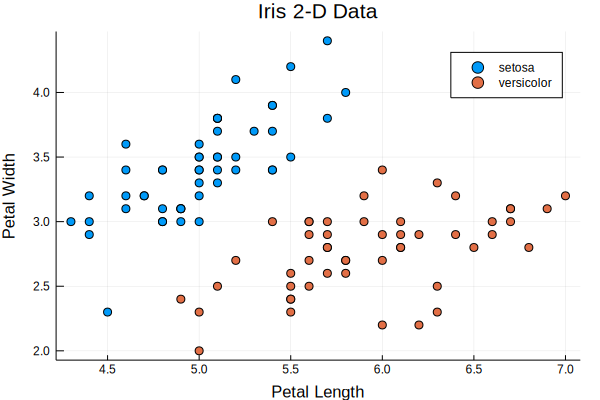

In [3]:
scatter([x[1:2] for x in data1 if x[3] == "setosa"], label = "setosa")
scatter!([x[1:2] for x in data1 if x[3] != "setosa"], label = "versicolor")
plot!(title = "Iris 2-D Data", xlabel = "Petal Length", ylabel = "Petal Width")

### Here we define the functions that we will use in the future.

In [6]:
# Assign random weights
w = rand(3)

# Perceptron Hypothesis Function 
function h(w, x)
    x_new = [1.0, x[1], x[2]]
    return w'x_new > 0 ? 1 : -1
end

# Perceptron Learning Algorithm 
function PLA(w, x, y)
    if h(w, x) != y
        w += y*[1.0, x[1], x[2]]
    end
    return w
end

function predictor(n, w, test)
    return h(w, test[n]) == 1 ? "setosa" : "versicolor"
end

predictor (generic function with 1 method)

## Our predict function

#### Takes in a data set and number of iterations. It will split the data into training and testing, train the data and make predictions. The output will be the percentage of correct predictions of your testing set.

In [70]:
function final_predict(data, iterations)
    w = rand(3)
    
    shuffled = data = data[shuffle(1:end), :]
    train = shuffled[1:80,:]
    test = shuffled[81:100,:]
    X, Y = [[x[1], x[2]] for x in train], [x[3] == "setosa" ? 1 : -1 for x in train]
    
        # Iterate the PLA 
    for i = 1:100
        # Choose random entries to update (if possible )
        j = rand(1:80)
        w = PLA(w, X[j], Y[j])
    end
    
    accuracy_count = []
    for i = 1:iterations
        n = rand(1:20)
        if predictor(n, w, test) == test[n][3]
            push!(accuracy_count, 1)
        end
    end
    accuracy = sum(accuracy_count) / iterations * 100
    return accuracy, w
end

final_predict (generic function with 1 method)

### Here we run our final_predict function on every dataset we created. We return our weight value as well so we can use it to plot later.

In [73]:
predict , w = final_predict(data1, 1000)
print("Our prediction percent is ", predict, "%")

Our prediction percent is 95.89999999999999%

In [76]:
predict , w = final_predict(data2, 1000)
print("Our prediction percent is ", predict, "%")

Our prediction percent is 100.0%

In [80]:
predict , w = final_predict(data3, 1000)
print("Our prediction percent is ", predict, "%")

Our prediction percent is 94.19999999999999%

In [81]:
predict , w = final_predict(data4, 1000)
print("Our prediction percent is ", predict, "%")

Our prediction percent is 100.0%

In [82]:
predict , w = final_predict(data5, 1000)
print("Our prediction percent is ", predict, "%")

Our prediction percent is 100.0%

In [83]:
predict , w = final_predict(data6, 1000)
print("Our prediction percent is ", predict, "%")

Our prediction percent is 100.0%

### As an example we will plot one of our datasets and show the lienarly separable line that forms the barrier between the two classes. The more separable the data, the higher the accuracy should be. This is not always the case as the random values we begin with can influence how slow/fast we converge to a linearly separable line.

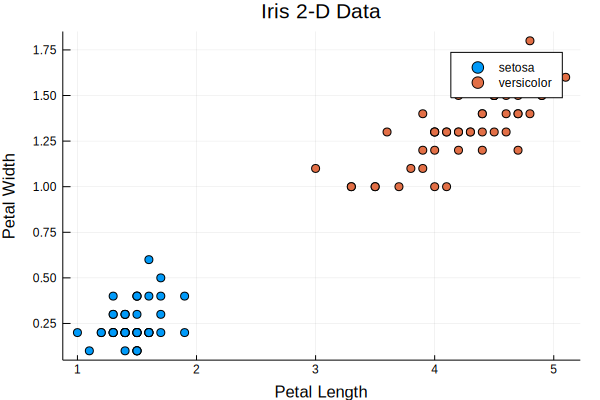

In [85]:
scatter([x[1:2] for x in data6 if x[3] == "setosa"], label = "setosa")
scatter!([x[1:2] for x in data6 if x[3] != "setosa"], label = "versicolor")
plot!(title = "Iris 2-D Data", xlabel = "Petal Length", ylabel = "Petal Width")

#### As we can see here, our data is very separate, and would explain the 100% accuracy we achieved. We will use the last weights (from data6) and plot the line.

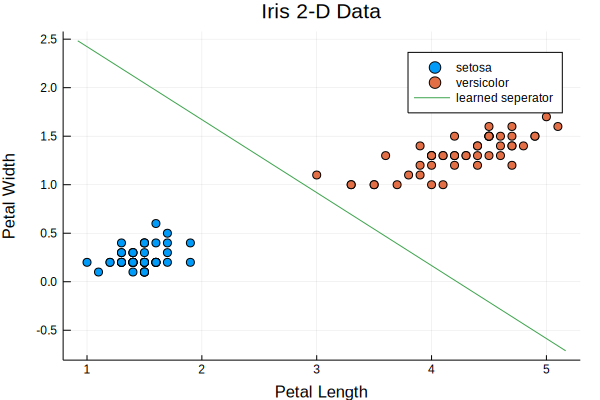

In [86]:
plot!(x -> (-w[1]-w[2]*x)/w[3], label= "learned seperator")

## In conclusion, our perceptron predicted very well on all combinations of data. Above 90% on all.